[0 1]
Columns with missing values: []
Categorical features: ['proto', 'service', 'state']
Columns with missing values: []
[[0.00000000e+00 0.00000000e+00 2.02463370e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.70320520e-06 5.70320520e-06 1.08317020e-02 ... 8.19672131e-02
  0.00000000e+00 0.00000000e+00]
 [1.14064104e-05 1.14064104e-05 2.70521550e-02 ... 8.19672131e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [4.69539181e-01 4.69539181e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.69544884e-01 4.69544884e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.69550587e-01 4.69550587e-01 1.50000028e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
                   Unnamed: 0        id       dur     proto   service  \
Unnamed: 0           1.000000  1.000000  0.017117 -0.003568  0.024453   
id                   1.000000  1.000000  0.017117 -0.003568  0.024453   
dur              

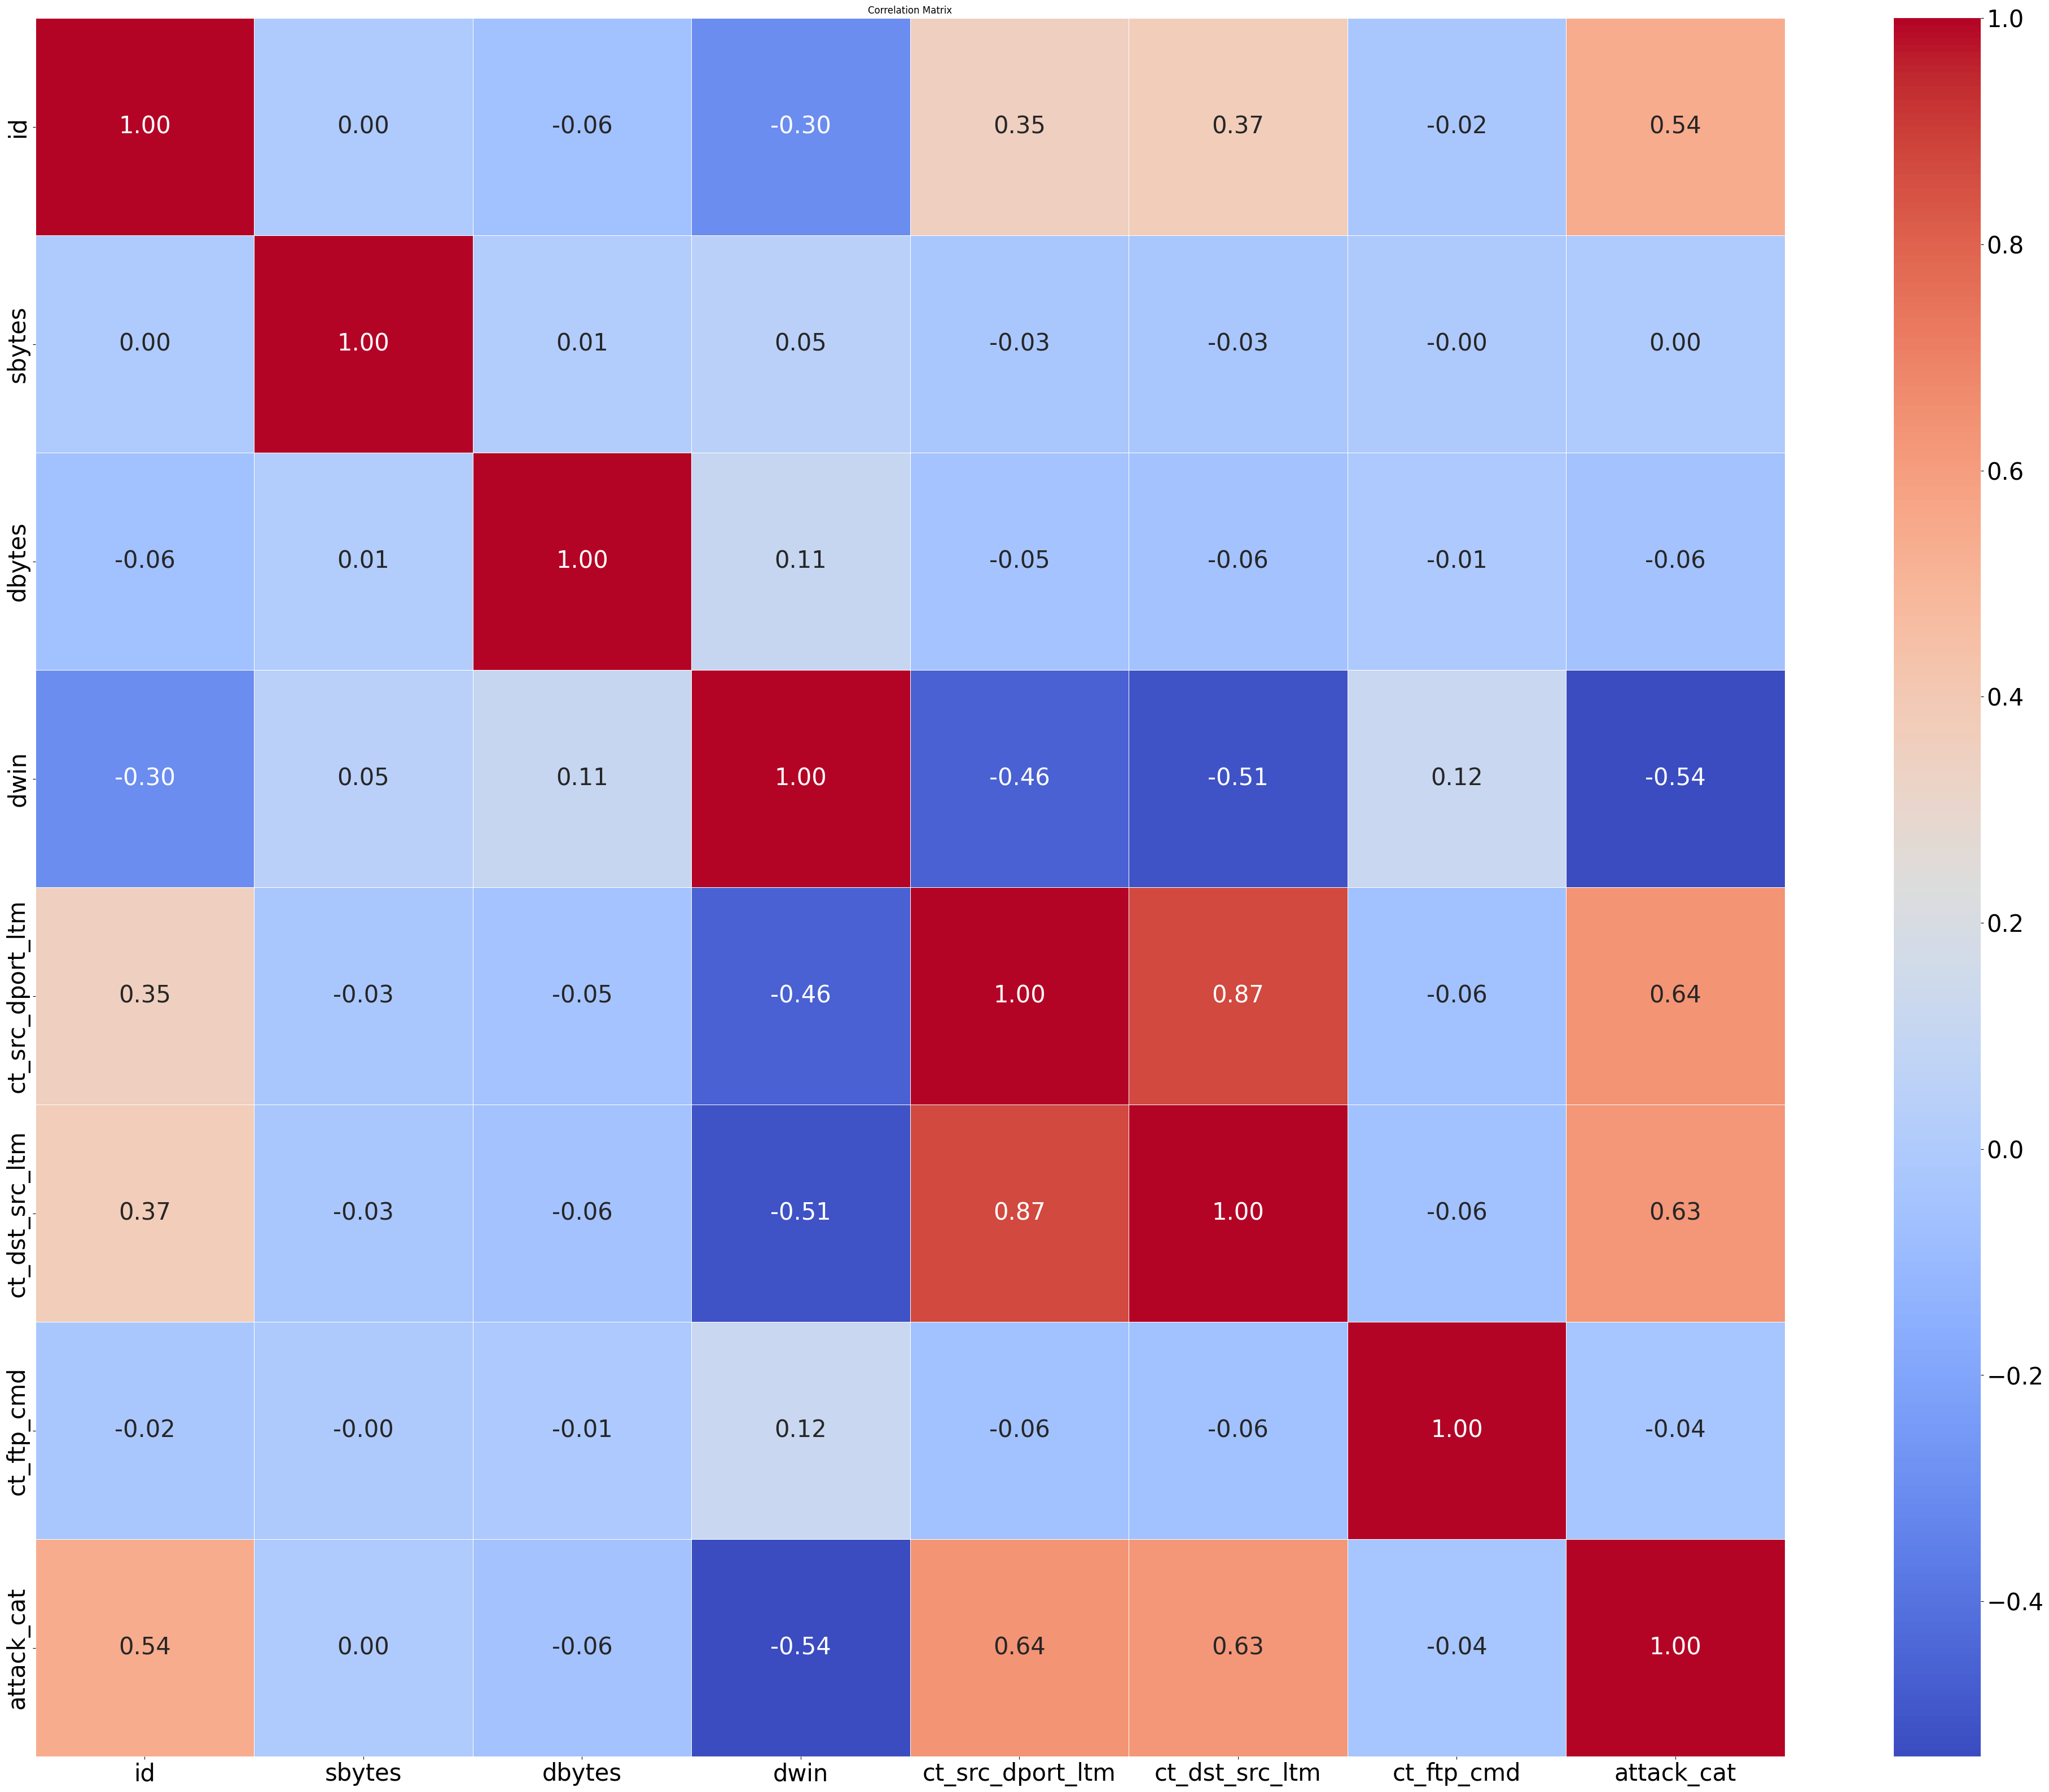

In [1]:
%run "C:\Users\11 PrO\Desktop\design proj\preprocessing_DNN_CNN_old.ipynb"


## DNN - MODEL

### importing the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


### Batch size to resolve class imbalance

In [3]:
import pandas as pd

# Assuming act_df is your DataFrame with 'attack_cat' column representing class attack_cats

# Function to sample 50,000 rows from each group without replacement if the group size is sufficient
def sample_rows(group):
    sample_size = min(50000, len(group))
    return group.sample(n=sample_size, replace=sample_size < 50000, random_state=0)

# Apply the sampling function to each group (label)
sampled_df = act_df.groupby('attack_cat', group_keys=False).apply(sample_rows)

# Reset the index of the sampled DataFrame
sampled_df.reset_index(drop=True, inplace=True)

# Display the sampled DataFrame
print(sampled_df)


              id    sbytes    dbytes  dwin  ct_src_dport_ltm  ct_dst_src_ltm  \
0       0.419705  0.000002  0.000000   0.0          0.000000        0.000000   
1       0.135468  0.000286  0.004333   1.0          0.000000        0.032258   
2       0.437647  0.000038  0.000047   1.0          0.017241        0.000000   
3       0.018461  0.000106  0.000112   1.0          0.068966        0.177419   
4       0.254768  0.000059  0.000091   1.0          0.000000        0.016129   
...          ...       ...       ...   ...               ...             ...   
185119  0.876782  0.000006  0.000000   0.0          0.293103        0.274194   
185120  0.753656  0.000006  0.000000   0.0          0.275862        0.258065   
185121  0.370423  0.000006  0.000000   0.0          0.034483        0.032258   
185122  0.726942  0.000006  0.000000   0.0          0.482759        0.580645   
185123  0.984407  0.000006  0.000000   0.0          0.275862        0.258065   

        ct_ftp_cmd  attack_cat  
0     

In [4]:
import pandas as pd

# Assuming act_df is your DataFrame with 'attack_cat' column representing class attack_cats

# Check the unique values in the 'attack_cat' column
unique_classes = sampled_df['attack_cat'].unique()

# Print the unique classes
print("Unique Classes:", unique_classes)

# Check the number of records for each class
class_counts = sampled_df['attack_cat'].value_counts()
print("Class Counts:")
print(class_counts)

Unique Classes: [0.   0.25 0.5  0.75 1.  ]
Class Counts:
attack_cat
0.00    50000
1.00    50000
0.50    44525
0.25    24246
0.75    16353
Name: count, dtype: int64


In [4]:
duplicates = sampled_df[sampled_df.duplicated()]
print("Duplicate rows:")
print(duplicates)


Duplicate rows:
              id    sbytes    dbytes  dwin  ct_src_dport_ltm  ct_dst_src_ltm  \
5472    0.173178  0.000116  0.000694   1.0          0.000000        0.000000   
8045    0.172482  0.000008  0.000012   0.0          0.000000        0.000000   
10188   0.179337  0.000108  0.000694   1.0          0.000000        0.000000   
12401   0.189249  0.000008  0.000012   0.0          0.000000        0.000000   
14139   0.221809  0.000008  0.000012   0.0          0.000000        0.000000   
...          ...       ...       ...   ...               ...             ...   
135119  0.308772  0.000012  0.000000   0.0          0.017241        0.064516   
135120  0.627444  0.000012  0.000000   0.0          0.034483        0.048387   
135121  0.527079  0.000012  0.000000   0.0          0.034483        0.145161   
135122  0.285970  0.000012  0.000000   0.0          0.051724        0.048387   
135123  0.622396  0.000012  0.000000   0.0          0.000000        0.016129   

        ct_ftp_cmd  att

### dropping duplicates

In [5]:
import pandas as pd

# Assuming sampled_df is your DataFrame
# Remove entirely identical rows
sampled_df = sampled_df.drop_duplicates()

# Reset the index of the DataFrame
sampled_df.reset_index(drop=True, inplace=True)

# Display the DataFrame without duplicates
print(sampled_df)


              id    sbytes    dbytes  dwin  ct_src_dport_ltm  ct_dst_src_ltm  \
0       0.419705  0.000002  0.000000   0.0          0.000000        0.000000   
1       0.135468  0.000286  0.004333   1.0          0.000000        0.032258   
2       0.437647  0.000038  0.000047   1.0          0.017241        0.000000   
3       0.018461  0.000106  0.000112   1.0          0.068966        0.177419   
4       0.254768  0.000059  0.000091   1.0          0.000000        0.016129   
...          ...       ...       ...   ...               ...             ...   
153933  0.876782  0.000006  0.000000   0.0          0.293103        0.274194   
153934  0.753656  0.000006  0.000000   0.0          0.275862        0.258065   
153935  0.370423  0.000006  0.000000   0.0          0.034483        0.032258   
153936  0.726942  0.000006  0.000000   0.0          0.482759        0.580645   
153937  0.984407  0.000006  0.000000   0.0          0.275862        0.258065   

        ct_ftp_cmd  attack_cat  
0     

### splitting training and testing dataset

In [6]:
X_sampled=sampled_df.drop(columns=["attack_cat"])
y_sampled=sampled_df["attack_cat"]

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=42)

# Split the temporary set into training (60%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

# Print the sizes of the sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))
# three sets: X_train, X_val, X_test and y_train, y_val, and y_test

Training set size: 92362
Validation set size: 23091
Testing set size: 38485


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming act_df is your DataFrame containing features and labels
# Replace 'label' with the actual column name for your labels

# Load your dataset or use your existing DataFrame
# act_df = pd.read_csv('your_dataset.csv')

# Count the occurrences of each label
label_counts = sampled_df['attack_cat'].value_counts()

# Plot the class distribution
label_counts.plot(kind='bar', rot=0)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Display the counts
print("Class Counts:")
print(label_counts)


NameError: name 'sampled_df' is not defined

### Building the model

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])


c:\Users\11 PrO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### optimization(to be run first)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import Sequential, Linear, ReLU, Softmax
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# Assuming act_df is your DataFrame containing features and labels

# Convert DataFrame to PyTorch tensor
X = torch.tensor(X_sampled.values, dtype=torch.float32)
y = torch.tensor(y_sampled.values, dtype=torch.long)  # Assuming 'label' is the column name for the labels

# Create TensorDataset
dataset = TensorDataset(X, y)

# Define your model
model = Sequential(
    Linear(X.size(1), 64),
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 5),
    Softmax(dim=1)
)

# Define criterion (loss function)
criterion = nn.CrossEntropyLoss()

# Define optimizer with weight decay
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.001)

# Create DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for inputs, labels in dataloader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()


### Compile the model

In [10]:
# Assuming you have a separate DataFrame for the test set named test_df

# Convert test DataFrame to PyTorch tensor
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDataset for test set
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoader for test set
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Evaluation loop
model.eval()  # Set model to evaluation mode
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation during evaluation
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Calculate loss using the criterion
        loss = criterion(outputs, labels)
        test_loss += loss.item()  # Convert loss tensor to scalar value
# Make predictions on testing data

# Calculate accuracy and average loss
accuracy = correct / total
average_loss = test_loss / len(test_dataloader)

print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Average loss on test set: {average_loss:.4f}") 


Accuracy on test set: 0.9387
Average loss on test set: 0.9675


### Confusion matrix

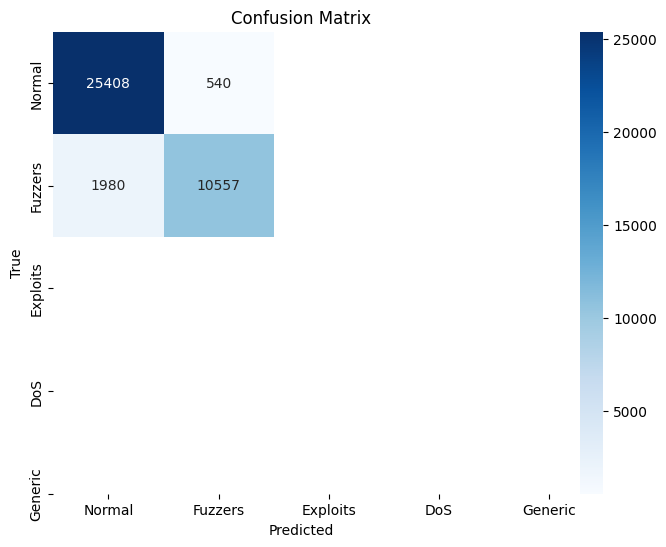

In [13]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your PyTorch model and have test data X_test and true labels y_test
# Replace these with your actual test data and true labels


# Set your model to evaluation mode
model.eval()

# Generate predictions using the trained model
with torch.no_grad():
    outputs = model(X_test)
    _, y_pred = torch.max(outputs, 1)

# Define the class labels
class_labels = ['Normal', 'Fuzzers', 'Exploits', 'DoS', 'Generic']

# Convert tensors to numpy arrays for confusion matrix calculation
y_test = y_test.numpy() if isinstance(y_test, torch.Tensor) else np.array(y_test)
y_pred = y_pred.numpy() if isinstance(y_pred, torch.Tensor) else np.array(y_pred)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8       , 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [15]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define a simple feedforward neural network model
class SimpleFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Parameters
num_samples = 100
num_classes = 5
input_size = 10
hidden_size = 20
batch_size = 10

# Create dummy dataset and dataloader
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create a simple FNN model
model = SimpleFNN(input_size, hidden_size, num_classes)

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs.float())  # Assuming inputs are torch tensors
        _, predicted = torch.max(outputs, 1)
        y_test.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = ['Normal', 'Fuzzers', 'Exploits', 'DoS', 'Generic']
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




TypeError: 'int' object is not callable

Accuracy: 0.6742367156034819


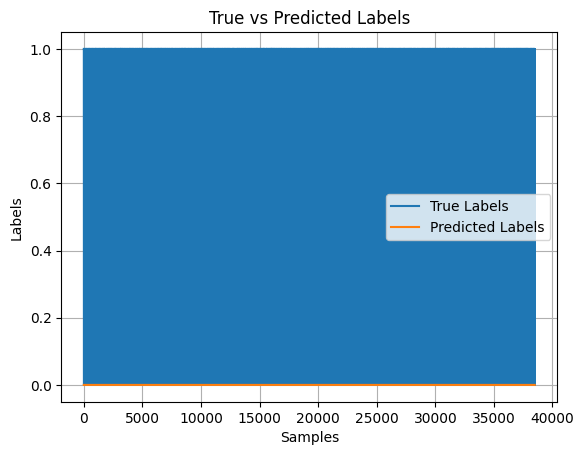

In [ ]:
import torch
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have loaded your trained model and have test data X_test and true labels y_true


# Set your model to evaluation mode
model.eval()

# Generate predictions using the trained model
with torch.no_grad():
    outputs = model(X_test)
    _, y_pred = torch.max(outputs, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred.numpy())

# Print accuracy and plot the accuracy graph
print(f'Accuracy: {accuracy}')
plt.plot(y_test, label='True Labels')
plt.plot(y_pred.numpy(), label='Predicted Labels')
plt.xlabel('Samples')
plt.ylabel('Labels')
plt.title('True vs Predicted Labels')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10, Loss: 1.1359, Accuracy: 0.7693
Epoch 2/10, Loss: 1.0363, Accuracy: 0.8694
Epoch 3/10, Loss: 1.0833, Accuracy: 0.8223
Epoch 4/10, Loss: 1.0442, Accuracy: 0.8613
Epoch 5/10, Loss: 1.1410, Accuracy: 0.7645
Epoch 6/10, Loss: 1.0813, Accuracy: 0.8243
Epoch 7/10, Loss: 1.0127, Accuracy: 0.8931
Epoch 8/10, Loss: 1.0168, Accuracy: 0.8889
Epoch 9/10, Loss: 1.1263, Accuracy: 0.7792
Epoch 10/10, Loss: 1.1377, Accuracy: 0.7677
Accuracy on test set: 0.9299
Average loss on test set: 0.9747


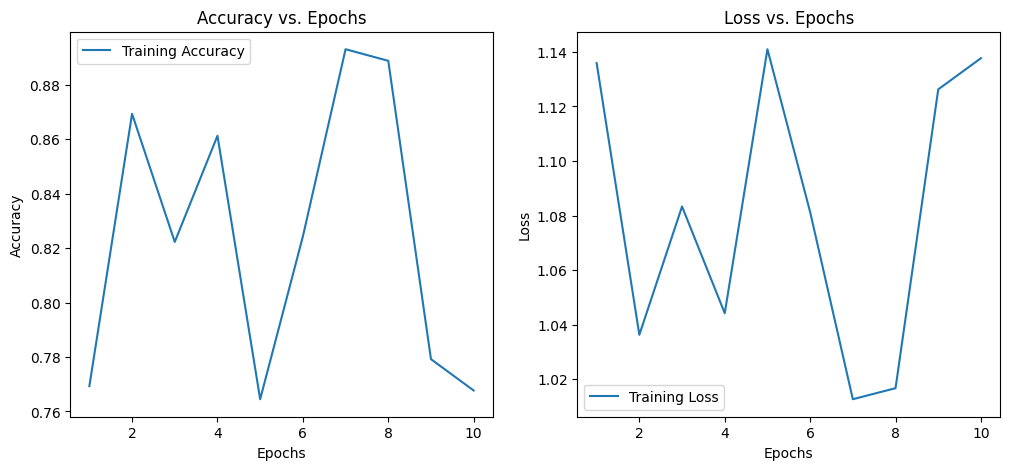

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import Sequential, Linear, ReLU, Softmax
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Assuming X_sampled and y_sampled are your features and labels DataFrames

# Convert DataFrame to PyTorch tensor
X = torch.tensor(X_sampled.values, dtype=torch.float32)
y = torch.tensor(y_sampled.values, dtype=torch.long)

# Create TensorDataset
dataset = TensorDataset(X, y)

# Define your model
model = Sequential(
    Linear(X.size(1), 64),
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 5),
    Softmax(dim=1)
)

# Define criterion (loss function)
criterion = nn.CrossEntropyLoss()

# Define optimizer with weight decay
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.001)

# Create DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Tracking metrics
train_losses = []
train_accuracies = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Assuming X_test and y_test are your test set DataFrames

# Convert test DataFrame to PyTorch tensor
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDataset for test set
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoader for test set
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Evaluation loop
model.eval()  # Set model to evaluation mode
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation during evaluation
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Calculate loss using the criterion
        loss = criterion(outputs, labels)
        test_loss += loss.item()  # Convert loss tensor to scalar value

# Calculate accuracy and average loss
accuracy = correct / total
average_loss = test_loss / len(test_dataloader)

print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Average loss on test set: {average_loss:.4f}") 

# Plot accuracy vs. epochs and loss vs. epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()
